# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

Boston housing dataset has 489 data points with 4 variables each.


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


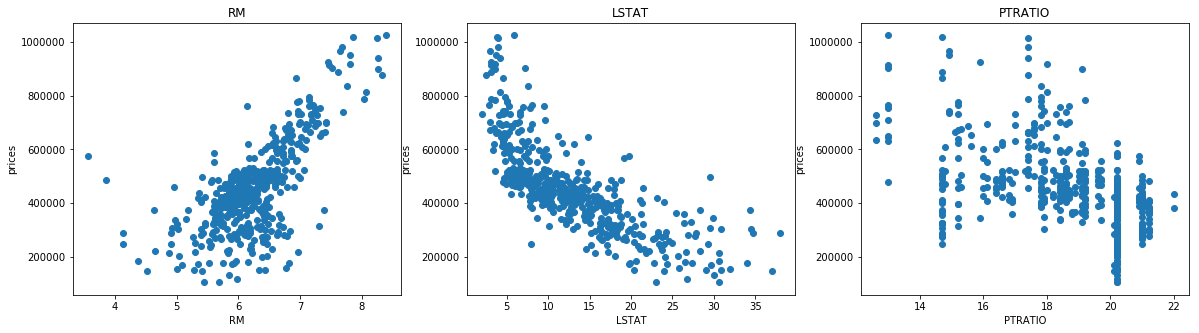

In [12]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

####################################################

data1 = pd.DataFrame.from_csv('housing.csv', index_col=None)

display(data1.head())

#import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.get_backend()
#ax=plt.gca()
#plt.figure(1)
#plt.plot(data['RM'],prices,'o')
#plt.xlabel('RM')
#plt.ylabel('Prices')

#plt.figure(2)
#plt.plot(data['LSTAT'],prices,'o',color='red')
#plt.xlabel('LSTAT')
#plt.ylabel('Prices')

#plt.figure(3)
#plt.plot(data['PTRATIO'],prices,'o',color='orange')
#plt.xlabel('PTRATIO')
#plt.ylabel('Prices')

plt.figure(figsize=(20, 5))
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.plot(data[col], prices, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [13]:
# TODO: Minimum price of the data
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
maximum_price = np.amax(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: ** 
- RM  
 Increasing in the value of RM usually results in boosting the price of homes because more materials are needed to build homes. However, if we consider the area of homes does not change and designers has to divide the same area to the more rooms it might causes the home becomes ugly. Therefore, the demand for the those kinds of homes reduce and their price will drop. 
- LSTAT  
 Increasing homeowners in a neighborhood is usually good because they know that they need to make a peaceful environment around them. However, if they are come from lower class the price of homes around that area might drop because buyers think that residents might involved in some illegal business, or the neighborhood is not safe. Beside, the school of that neighborhood might not be appropriate. Hence, people will not be interested in buying home around that neighborhood and the price will decrease.        
- PTRATIO 
 I expect that higher LSTAT decrease the price of home. Although this factor has not have a crucial effect on the price home, residents want their children get a decent education and one factor of a decent education is the number of teacher to student.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [14]:
# TODO: Import 'r2_score'

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    from sklearn.metrics import r2_score
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)  
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [15]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** Model has a coefficient of determination, R^2, of 0.923.

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

    0% indicates that the model explains none of the variability of the response data around its mean.
    100% indicates that the model explains all the variability of the response data around its mean.

In general, the higher the R-squared, the better the model fits your data [1].

Therefore, our prediction model works well.


Reference : 

[1] [What Is R-squared?](http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit)

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [16]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test =train_test_split(features, prices, test_size=0.2, random_state=42)
# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** We usually devide our data into three parts train, validation and test. However, we can divide the data into two part for simplicity. If we made a model based on all of data, we could not examine the model and find out the drawbacks of our model.   

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

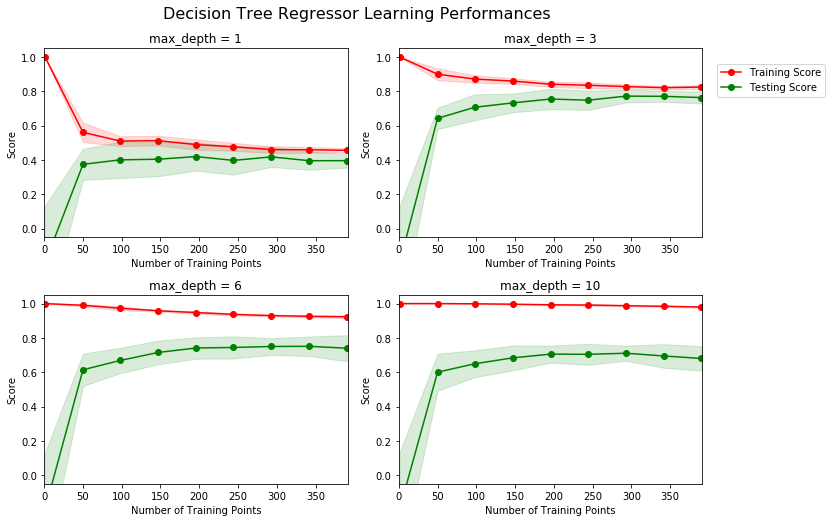

In [17]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **  I would choose the plot with max_depth = 3. The score of the training cure would smoothly decrease if we added more training point. I think it will converge to around 0.8. In the case of the testing, I think the curve will increase slightly to converge to around 0.8. I do not think we need adding more training points will be very helpful because the cure already starts to converge although having more data always helps to have more precise model.  

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

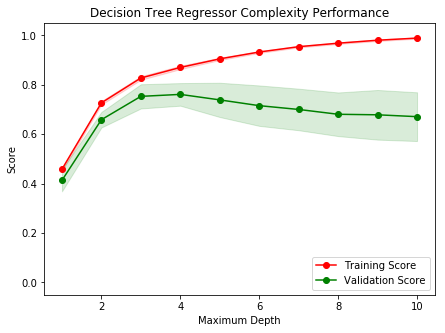

In [18]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: ** When the model is trained with a maximum depth of 1, the model    suffers from high bias becasue tarining score converges low score. On the other hand, When the model is trained with a maximum depth of 1o, the model  suffers high variance becasue the tarining score is alomst 1 and there is a gab between traning and testing.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** I think that maximum depth = 3 is the best generalize model for our prediction becasue i has high score and train and test converge to the score = .8 which is also the high score.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** Consider the standard classification framework - you have a sample which you divide into training sample (Strain) and validation sample (Svalid). You are solving an optimization problem P (which would usually be something like minimize training error plus a regularization term), which is a function of the model parameters, say w, the training sample Strain and some hyperparameters, sayα and β.

Solving the optimization problem for a fixed set of values of α and β gives you a value of w. Since the optimal value of w (call it w∗) is a function of α and β, we can write it as follows:

w∗(α,β)=argminwP(w,α,β,Strain)

Now you use this w∗ to predict on the validation sample to get validation error. You can view this scenario in terms of a "validation error function": the function takes as inputs the hyperparameters α and β, and returns the validation error corresponding to w∗(α,β).

So the goal of hyperparameter optimization is to find the set of values of α and β, that minimize this validation error function.

Note that this validation error function is very expensive to evaluate -- for each value of α and β, to find the value of this function, you need to solve the optimization problem P. Further, this function might be non-convex, non-smooth, etc. so that it is impractical to find the global minimum of this function in a principled way.

Therefore, we resort to grid search : pick a bunch of values of α -- (α1,α2,…), pick a bunch of values of β -- (β1,β2,…) and for each pair of values, evaluate the validation error function. Then pick the pair that gives the minimum value of the validation error function.

The pairs (α1,β1),(α1,β2),…,(α2,β1),(α2,β2),…when plotted in space look like a grid, hence the name[1].

Let's take a quick example: Suppose you have a classification problem. You plan to use decision trees for the task. The complexity of decision trees is determined by their depth. So you take function classes T1,…,Tk, where Ti is the set of all decision trees of depth at most i. These function classes are therefore parameterized by the hyperparameter i -- only this quantity distinguishes one class from the other. You try different values of i, fit the best tree of depth at most i on the training data, and choose the one with minimum error on unseen data. So finding the (nearly) optimal value of i is the process of hyperparameter optimization[2].

[1] I refered [Quora discussion](https://www.quora.com/Machine-Learning-How-does-grid-search-work)

[2] I refered [Quora discussion](https://www.quora.com/What-is-hyperparameter-optimization-in-machine-learning-in-formal-terms/answer/Prasoon-Goyal#)

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **  
Firt we need to learn about holdout method :
The holdout method is the simplest kind of cross validation. The data set is separated into two sets, called the training set and the testing set. The function approximator fits a function using the training set only. Then the function approximator is asked to predict the output values for the data in the testing set (it has never seen these output values before). The errors it makes are accumulated as before to give the mean absolute test set error, which is used to evaluate the model. The advantage of this method is that it is usually preferable to the residual method and takes no longer to compute. However, its evaluation can have a high variance. The evaluation may depend heavily on which data points end up in the training set and which end up in the test set, and thus the evaluation may be significantly different depending on how the division is made.

K-fold cross validation is one way to improve over the holdout method. The data set is divided into k subsets, and the holdout method is repeated k times. Each time, one of the k subsets is used as the test set and the other k-1 subsets are put together to form a training set. Then the average error across all k trials is computed. The advantage of this method is that it matters less how the data gets divided. Every data point gets to be in a test set exactly once, and gets to be in a training set k-1 times. The variance of the resulting estimate is reduced as k is increased. The disadvantage of this method is that the training algorithm has to be rerun from scratch k times, which means it takes k times as much computation to make an evaluation. A variant of this method is to randomly divide the data into a test and training set k different times. The advantage of doing this is that you can independently choose how large each test set is and how many trials you average over [1]. 

[1] I refered [Cross Validation](https://www.cs.cmu.edu/~schneide/tut5/node42.html)


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [19]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import  GridSearchCV 
from sklearn.cross_validation import ShuffleSplit


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    #cv_sets = ShuffleSplit(X.shape[0], n_splits = 10, test_size = 0.20, random_state = 0)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0) 
    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = sklearn.metrics.make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [20]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer:  Parameter 'max_depth' is 4 for the optimal model. WE had for figures on the Q 6 I choose man_depth = 3 which is closest number to the 4

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36
98
               RM       LSTAT     PTRATIO
count  489.000000  489.000000  489.000000
mean     6.240288   12.939632   18.516564
std      0.643650    7.081990    2.111268
min      3.561000    1.980000   12.600000
25%      5.880000    7.370000   17.400000
50%      6.185000   11.690000   19.100000
75%      6.575000   17.120000   20.200000
max      8.398000   37.970000   22.000000


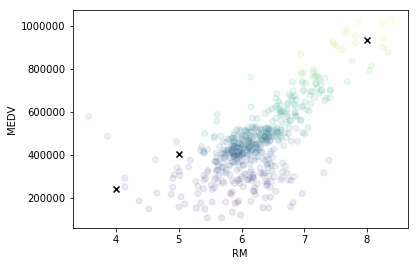

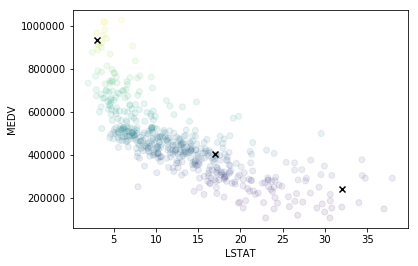

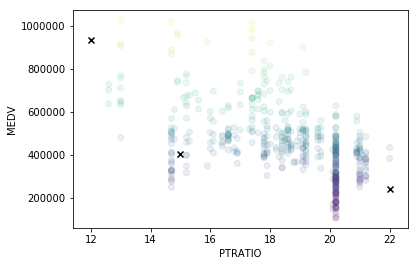

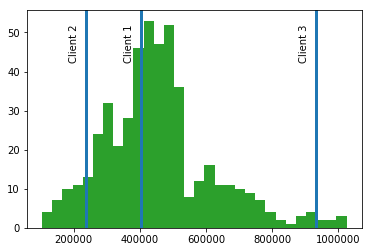

In [40]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
print X_test.ix[:,'RM'].size
x_1 = np.array(X_test.ix[:,'RM'])
x_2 = np.array(X_test.ix[:,'LSTAT'])
x_3 = np.array(X_test.ix[:,'PTRATIO'])
y_1 = reg.predict(X_test)    
#print type(x_1)
#print type(y_1)
#print y_1.size

print features.describe()

#plt.figure(1)
#plt.plot(y_1,x_1,'o')
#plt.plot(y_1,x_2,'o',color='red')
#plt.plot(y_1,x_3,'o',color='orange')

#plot a histogram of all of the housing prices in 
#this dataset and see where each of these predictions fal
    
    
#
plt.figure(2)
clients = np.transpose(client_data)
pred = reg.predict(client_data)
for i, feat in enumerate(['RM', 'LSTAT', 'PTRATIO']):
    plt.scatter(features[feat], prices, c=prices, alpha=0.1)
    plt.scatter(clients[i], pred, color='black', marker='x')
    plt.xlabel(feat)
    plt.ylabel('MEDV')
    plt.show()
    
plt.figure(3)
for i,price in enumerate(reg.predict(client_data)):
    plt.hist(prices, bins = 30)
    plt.axvline(price, lw = 3)
    plt.text(price-50000, 50, 'Client '+str(i+1), rotation=90)

**Answer: ** firt we need to look at our dat set data,Statistics for Boston housing dataset:

Minimum price: 105,000.00
Maximum price: 1,024,800.00
Mean price: 454,342.94
Median price 438,900.00
Standard deviation of prices: $165,171.13

and our prediction for selling is: 

Predicted selling price for Client 1's home: 403,025.00
Predicted selling price for Client 2's home: 237,478.72
Predicted selling price for Client 3's home: 931,636.36

The first three figure above show the real price and predicted price as a function of RM, LSTAT and PTRTIO, respectively. The lowest, meduim and highest predicted price corrspond to Client 2, 1 and 3 respectivly. 

Client 1's home price prediction is almost at the middle level of price becasue the home condition is also is at the middle although the price is a little lower than mean price.
In the case of client 1, RM vs. price plot, we can see that the pridction is almost above the average point price around this prediction. Therefore, client 1 will be get profite if he will sell his home only based on this feature. For LSTAT vs. price becasue of the same reason he is winner. However, in the case of PTRATIO the prediction is bellow averege of points around it. This might be reason the pridicted price is lower than mean price. Form fourth figure (Bar) we can see that the predicted home price is above the arerege of the home price. Therefore, I think Client 1 can sell the home with predicted price although I think if Client 1 is patient enough he can find a good deal.

In the case of Client 2's, our prediction is 237,478.72 and it is considered as the cheap home prise zone. The  Minimum price: 105,000.00.   and Mean price: 454,342.94. From plot RM vs. price, it is seen that  the predicted price is around the averege price in its neighbours although we can see there are two home with small room has very high price. I think that for the analysis we can drop samplest that is very high and very low because they migh be very special case. Hence, in this case the predicted price is plausible. In the case of LSTAT vs Price the prediction also is fair compare the real home price. In the case of PTRATIO vs. price our predition is not precise becasue it is very below of the price of home and it is originate from the lack of data. If we look at the fouth plot we can see that the pridicted price is around the average of low price home; Therefore, the home price prediction.

In the Client 3's home price pridiction, if we compare the real price and the predition from all plots with no doubt I suggest the client 3 sals home becasue we predicit his/her home price fairly higher than real price then he/she is winner.



### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [32]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **
- *I think we consider three features that still are important to determine the price of home. Although nowdays we might be ietersted in other features such as accessing to public trasportation or a big mall, I still  think the features we choose are fundamental features and if we have more data from other years I think we might see the same patern. 

- *The features that we considered are basics features and I think we need to consider much more features to have more realistic prediction. But, still these feature can provide some info. 

- *It might be enough good prediction if real state agent consider the range of price around 69000.00

- *I think it might be relevant because number of room, location are important to determine any home price. Determining the price in urban neighbourhood has own features but I think we can generalize our method for urban home price and i Think we can find some similarities  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.